### PCA

In [1]:
import pandas as pd
import numpy as np
import mglearn
import matplotlib.pyplot as plt

import seaborn as sns

### Importation of the cleaned data

In [2]:
nba =  pd.read_csv("./data/Cleaned-NBA Data Analytics.csv", encoding="utf-8")
nba.head(5)

,SEASON,GAME_DATE_MONTH,GAME_DATE_DAY,RESULT,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away
0,2021,11,17,1,1610612766,97,0.438,0.500,0.313,30,59,1610612764,87,0.367,0.813,0.190,23,48
1,2021,11,17,1,1610612765,97,0.425,0.750,0.286,16,42,1610612754,89,0.418,0.737,0.243,14,43
2,2021,11,17,1,1610612737,110,0.506,0.833,0.351,28,40,1610612738,99,0.440,0.824,0.268,24,42
3,2021,11,17,1,1610612751,109,0.458,0.840,0.375,29,47,1610612739,99,0.393,0.857,0.250,20,50
4,2021,11,17,1,1610612748,113,0.483,0.824,0.375,29,39,1610612740,98,0.440,0.786,0.286,18,38


### Normalization of data values

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
scaler = StandardScaler()
scaler.fit(nba)
X_scaled = scaler.transform(nba)

In [5]:
from sklearn.decomposition import PCA
pca =  PCA(n_components = 2)
pca.fit(X_scaled)

PCA(n_components=2)

In [6]:

d = dict(nba["RESULT"].value_counts())
d = {"Win":   [d[1], round(d[1]/nba.shape[0],2) ] , "Defeat":[d[0], round(d[0]/nba.shape[0],2)]}
pd.DataFrame(d, index=['Total', "Pourcentage_%"])


,Win,Defeat
Total,1523.00,1271.00
Pourcentage_%,0.55,0.45


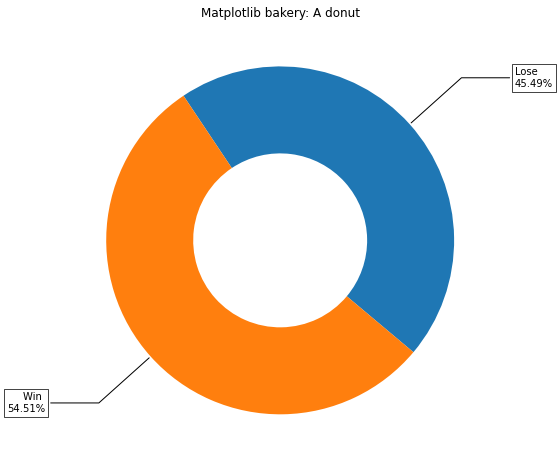

In [34]:
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))

recipe = ["Lose \n"+str(round(nba.RESULT.value_counts()[0]*100/nba.shape[0],2))+"%","Win \n"+str( round(nba.RESULT.value_counts()[1]*100/nba.shape[0],2))+"%"]

data = [nba.RESULT.value_counts()[0], nba.RESULT.value_counts()[1]]
,
wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Matplotlib bakery: A donut")

plt.show()

In [14]:
X_pca =  pca.transform(X_scaled)
print("Shape before PCA operation {}".format(str(X_scaled.shape)))
print("Shape after PCA operation {}".format(str(X_pca.shape)))

Shape before PCA operation (2794, 18)
Shape after PCA operation (2794, 2)


Text(0, 0.5, 'Second principal component')

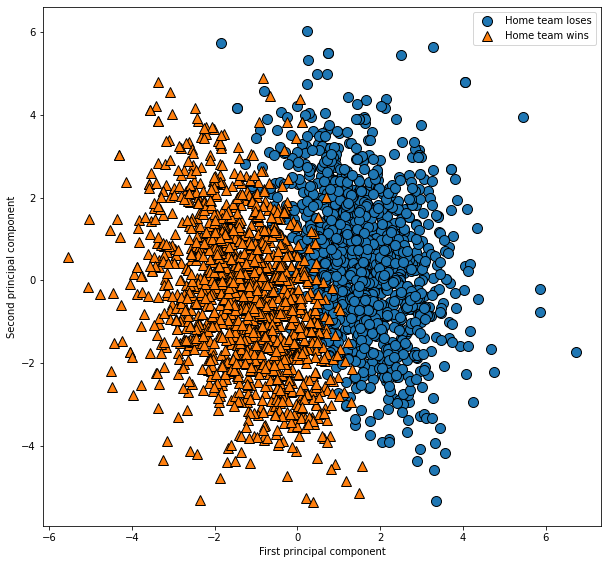

In [10]:
plt.figure(figsize=(10,10))

nba_target = [nba["GAME_DATE_MONTH"],"RESULT"]
mglearn.discrete_scatter(X_pca[:,0], X_pca[:,1], nba.RESULT.to_numpy())
plt.legend(["Home team loses","Home team wins"], loc="best")
plt.gca().set_aspect('equal')
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

Text(0, 0.5, 'Home teams result')

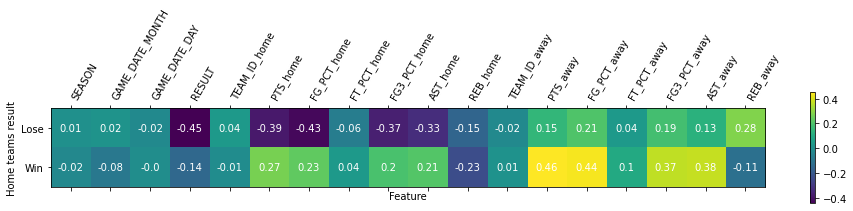

In [11]:
plt.matshow(pca.components_, cmap = 'viridis')

plt.yticks([0,1], ["Lose","Win"])
plt.colorbar()
plt.xticks(range(len(nba.columns)), nba.columns, rotation =60, ha='left')

# Loop over data dimensions and create text annotations.
for i in range(len(["First component", "Second component"])):
    for j in range(len(nba.columns)):
        text = plt.text(j, i, round(pca.components_[i, j],2),
                       ha="center", va="center", color="w")

plt.xlabel("Feature")
plt.ylabel("Home teams result")